In [8]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [10]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [12]:
# Use the print() function to display the latitude and longitude combinations.
#for coordinate in coordinates:
    #print(coordinate[0], coordinate[1])

In [13]:
from citipy import citipy

In [16]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [17]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [18]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bethel
Processing Record 2 of Set 1 | eureka
Processing Record 3 of Set 1 | kuzino
Processing Record 4 of Set 1 | praia
Processing Record 5 of Set 1 | sambava
Processing Record 6 of Set 1 | kapaa
Processing Record 7 of Set 1 | padang
Processing Record 8 of Set 1 | jamestown
Processing Record 9 of Set 1 | arraial do cabo
Processing Record 10 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | porto empedocle
Processing Record 13 of Set 1 | cayenne
Processing Record 14 of Set 1 | avarua
Processing Record 15 of Set 1 | coquimbo
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | mahebourg
Processing Record 18 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 19 of Set 1 | grand-santi
Processing Record 20 of Set 1 | caconda
Processing Record 21 of Set 1 | hami
Processing Record 22 of Set 1 

Processing Record 38 of Set 4 | fonte boa
Processing Record 39 of Set 4 | ponta do sol
Processing Record 40 of Set 4 | jalu
Processing Record 41 of Set 4 | khatanga
Processing Record 42 of Set 4 | fasa
Processing Record 43 of Set 4 | palmer
Processing Record 44 of Set 4 | puerto leguizamo
Processing Record 45 of Set 4 | hobyo
Processing Record 46 of Set 4 | tazmalt
Processing Record 47 of Set 4 | wanaka
Processing Record 48 of Set 4 | akyab
Processing Record 49 of Set 4 | mecca
Processing Record 50 of Set 4 | kozova
Processing Record 1 of Set 5 | qaanaaq
Processing Record 2 of Set 5 | bazarnyye mataki
Processing Record 3 of Set 5 | vardo
Processing Record 4 of Set 5 | esil
Processing Record 5 of Set 5 | port hardy
Processing Record 6 of Set 5 | sao joao do piaui
Processing Record 7 of Set 5 | clyde river
Processing Record 8 of Set 5 | aykhal
Processing Record 9 of Set 5 | barawe
City not found. Skipping...
Processing Record 10 of Set 5 | makaryev
Processing Record 11 of Set 5 | barraut

Processing Record 24 of Set 8 | cap-aux-meules
Processing Record 25 of Set 8 | nowe miasto lubawskie
Processing Record 26 of Set 8 | korla
Processing Record 27 of Set 8 | ancud
Processing Record 28 of Set 8 | youghal
Processing Record 29 of Set 8 | gardan diwal
City not found. Skipping...
Processing Record 30 of Set 8 | ruatoria
City not found. Skipping...
Processing Record 31 of Set 8 | samana
Processing Record 32 of Set 8 | phan thiet
Processing Record 33 of Set 8 | marcona
City not found. Skipping...
Processing Record 34 of Set 8 | barentsburg
City not found. Skipping...
Processing Record 35 of Set 8 | basco
Processing Record 36 of Set 8 | ihosy
Processing Record 37 of Set 8 | vega de alatorre
Processing Record 38 of Set 8 | samusu
City not found. Skipping...
Processing Record 39 of Set 8 | gollere
City not found. Skipping...
Processing Record 40 of Set 8 | chateaudun
Processing Record 41 of Set 8 | walla walla
Processing Record 42 of Set 8 | yulara
Processing Record 43 of Set 8 | m

Processing Record 10 of Set 12 | sal
Processing Record 11 of Set 12 | evensk
Processing Record 12 of Set 12 | youkounkoun
Processing Record 13 of Set 12 | kysyl-syr
Processing Record 14 of Set 12 | chatra
Processing Record 15 of Set 12 | harper
Processing Record 16 of Set 12 | weligama
Processing Record 17 of Set 12 | ballina
Processing Record 18 of Set 12 | trinidad
Processing Record 19 of Set 12 | atambua
Processing Record 20 of Set 12 | kizilskoye
Processing Record 21 of Set 12 | taksimo
Processing Record 22 of Set 12 | sonoita
Processing Record 23 of Set 12 | flinders
Processing Record 24 of Set 12 | khandyga
Processing Record 25 of Set 12 | san patricio
Processing Record 26 of Set 12 | ust-nera
Processing Record 27 of Set 12 | tura
Processing Record 28 of Set 12 | teahupoo
Processing Record 29 of Set 12 | isangel
Processing Record 30 of Set 12 | miyako
Processing Record 31 of Set 12 | meulaboh
Processing Record 32 of Set 12 | zhanaozen
Processing Record 33 of Set 12 | luwuk
Proces

In [19]:
len(city_data)

558

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Bethel,41.3712,-73.4140,75.07,82,75,3.44,US,2022-07-07 03:07:13
1,Eureka,40.8021,-124.1637,65.68,83,35,3.00,US,2022-07-07 03:03:25
2,Kuzino,57.0224,59.4412,59.16,70,56,2.30,RU,2022-07-07 03:07:14
3,Praia,14.9215,-23.5087,74.53,84,70,9.01,CV,2022-07-07 03:07:14
4,Sambava,-14.2667,50.1667,69.19,83,59,11.86,MG,2022-07-07 03:07:14
5,Kapaa,22.0752,-159.3190,82.38,85,100,14.97,US,2022-07-07 03:07:14
6,Padang,-0.9492,100.3543,86.05,62,35,2.30,ID,2022-07-07 03:07:15
7,Jamestown,42.0970,-79.2353,65.01,85,0,6.91,US,2022-07-07 03:07:15
8,Arraial Do Cabo,-22.9661,-42.0278,69.89,88,0,24.72,BR,2022-07-07 03:07:15
9,Atuona,-9.8000,-139.0333,77.63,81,22,26.26,PF,2022-07-07 03:07:16


In [23]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bethel,US,2022-07-07 03:07:13,41.3712,-73.4140,75.07,82,75,3.44
1,Eureka,US,2022-07-07 03:03:25,40.8021,-124.1637,65.68,83,35,3.00
2,Kuzino,RU,2022-07-07 03:07:14,57.0224,59.4412,59.16,70,56,2.30
3,Praia,CV,2022-07-07 03:07:14,14.9215,-23.5087,74.53,84,70,9.01
4,Sambava,MG,2022-07-07 03:07:14,-14.2667,50.1667,69.19,83,59,11.86


In [24]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [25]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

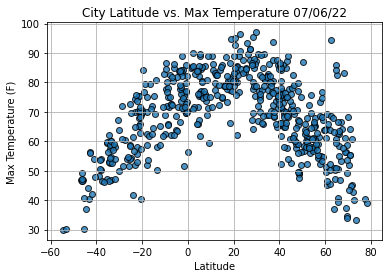

In [26]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

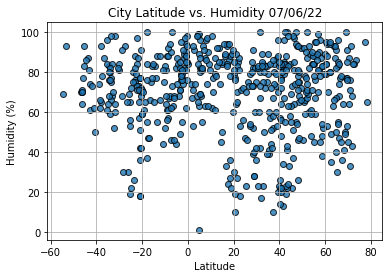

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

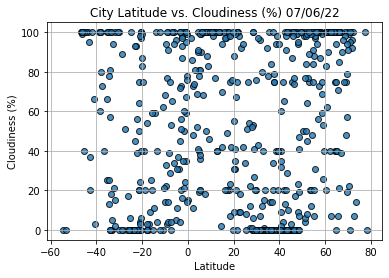

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()